In [2]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import numpy as np
import matplotlib as mpl
import pandas as pd
import scipy as sp;


In [4]:
pwd

'/Users/amnon/git/paper-daycare'

In [5]:
ca.set_log_level(11)

In [6]:
%matplotlib inline

In [7]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the (rarified) data

In [28]:
datn = ca.read_amplicon('data/gan-subsampled.biom', 'data/gan-subsampled_sample.txt', min_reads=1000, normalize=None)

2021-10-05 17:57:03 INFO loaded 268 samples, 14052 features
2021-10-05 17:57:03 WARNING Do you forget to normalize your data? It is required before running this function
2021-10-05 17:57:03 INFO After filtering, 268 remain.


## Now load the 10 additional rarified experiments

In [29]:
datr = datn.copy()

In [30]:
for i in range(10):
    exp = ca.read_amplicon('./data/rarefactions/gan-subsampled-%s.biom' % i, 'data/gan-subsampled_sample.txt', min_reads=1000, normalize=None)
    datr=datr.join_experiments(exp, 'exp-%s' % i, prefixes=['o','j'])

2021-10-05 17:57:04 INFO loaded 268 samples, 14052 features
2021-10-05 17:57:05 WARNING Do you forget to normalize your data? It is required before running this function
2021-10-05 17:57:05 INFO After filtering, 268 remain.
2021-10-05 17:57:05 INFO Both experiments contain same sample IDs - adding prefixes
2021-10-05 17:57:09 INFO loaded 268 samples, 14052 features
2021-10-05 17:57:10 WARNING Do you forget to normalize your data? It is required before running this function
2021-10-05 17:57:10 INFO After filtering, 268 remain.
2021-10-05 17:57:14 INFO loaded 268 samples, 14052 features
2021-10-05 17:57:15 WARNING Do you forget to normalize your data? It is required before running this function
2021-10-05 17:57:15 INFO After filtering, 268 remain.
2021-10-05 17:57:15 INFO Both experiments contain same sample IDs - adding prefixes
2021-10-05 17:57:20 INFO loaded 268 samples, 14052 features
2021-10-05 17:57:20 WARNING Do you forget to normalize your data? It is required before running this

### Get rid of features with 0 reads

In [31]:
datn=datn.filter_sum_abundance(0.000001)
datr=datr.filter_sum_abundance(0.000001)

2021-10-05 17:58:10 WARNING Do you forget to normalize your data? It is required before running this function
2021-10-05 17:58:10 INFO After filtering, 1274 remain.
2021-10-05 17:58:10 WARNING Do you forget to normalize your data? It is required before running this function
2021-10-05 17:58:10 INFO After filtering, 1452 remain.


/Users/amnon/git/calour/calour/heatmap/heatmap.py:308: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad(bad_color)


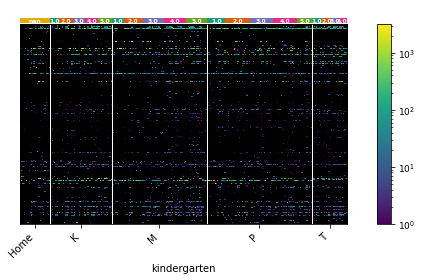

In [32]:
datn.plot(sample_field='kindergarten',barx_fields=['Time'])

# Plot the alpha-diversity plot

In [33]:
datr.sparse=False

In [34]:
def get_sample_alpha(exp):
    alpha = {}
    alphastd = {}
    for cid, cexp in exp.iterate('sample_ID'):
        cnum = (cexp.data>0).sum(axis = 1)
        alpha[cid] = np.mean(cnum)
        alphastd[cid] = np.std(cnum)
    return alpha, alphastd

In [35]:
allmean,allstd=get_sample_alpha(datr)

In [36]:
dats=datn.copy()
for cid in allmean.keys():
    dats.sample_metadata.loc[dats.sample_metadata['sample_ID']==cid,'avgspecies'] = allmean[cid]
    dats.sample_metadata.loc[dats.sample_metadata['sample_ID']==cid,'stdspecies'] = allstd[cid]


In [37]:
datn.sample_metadata['avgspecies'] = np.sum(datn.data>0, axis=1)

AmpliconExperiment with 41 samples, 1274 features
AmpliconExperiment with 54 samples, 1274 features
AmpliconExperiment with 52 samples, 1274 features
AmpliconExperiment with 57 samples, 1274 features
AmpliconExperiment with 40 samples, 1274 features
AmpliconExperiment with 24 samples, 1274 features


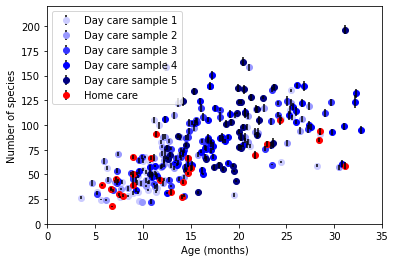

In [38]:
f=plt.figure()
tt=dats.filter_samples('kindergarten',['Home','Family'],negate=True)
tt=tt.filter_samples('Time',1)
print(tt)
plt.errorbar(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,yerr=tt.sample_metadata.stdspecies,fmt='o',c=[0.8,0.8,1,1],ecolor='k',barsabove=True)
tt=dats.filter_samples('Time',2)
print(tt)
plt.errorbar(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,yerr=tt.sample_metadata.stdspecies,fmt='o',c=[0.6,0.6,1,1],ecolor='k',barsabove=True)
tt=dats.filter_samples('Time',3)
print(tt)
plt.errorbar(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,yerr=tt.sample_metadata.stdspecies,fmt='o',c=[0.2,0.2,1,1],ecolor='k',barsabove=True)
tt=dats.filter_samples('kindergarten',['Home','Family'],negate=True)
tt=dats.filter_samples('Time',4)
print(tt)
plt.errorbar(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,yerr=tt.sample_metadata.stdspecies,fmt='o',c=[0,0,1,1],ecolor='k',barsabove=True)
tt=dats.filter_samples('Time',5)
print(tt)
plt.errorbar(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,yerr=tt.sample_metadata.stdspecies,fmt='o',c=[0,0,0.5,1],ecolor='k',barsabove=True)
tt=dats.filter_samples('kindergarten','Home')
print(tt)
plt.errorbar(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,yerr=tt.sample_metadata.stdspecies,fmt='o',c=[1,0,0,1],ecolor='k',barsabove=True)
plt.xlim([0,35])
plt.ylim([0,220])
plt.xlabel('Age (months)')
plt.ylabel('Number of species')
plt.legend(['Day care sample 1','Day care sample 2','Day care sample 3','Day care sample 4','Day care sample 5','Home care'])

In [39]:
f.savefig('figures/fig-alpha-age-scatter.pdf')

# Do age binning and p-value for alpha diversity

In [19]:
def draw_age_alpha_onebar(threshold=0.5):
    '''Draw the per age-bin alpha diversity from home and kindergarten kids, and print the significance
    
    Parameters
    ----------
    threshold: float, optional
        the minimal number of reads for a feature to be defined as present
        
    
    Returns
    f: matplotlib.figure
        the figure with the bar plot
    '''
    f=plt.figure()
    colors=['r']
    colors.extend(list(plt.cm.Blues(np.linspace(0.5,1,5))))
    res=pd.DataFrame(columns=['age','hmean','gmean', 'hstd', 'gstd','agegrp'])
#     tt.sample_metadata['avgspecies']=np.sum(tt.data>=threshold,axis=1)
    for cage_cat, cexp in tt.iterate('age_cat', axis=0):
        cage_cat_num = cexp.sample_metadata.iloc[0]['age_cat_num']
        tthome = cexp.filter_samples('kindergarten','Home')
        ttgan = cexp.filter_samples('kindergarten','Home',negate=True)
        alpha_home=np.nanmean(tthome.sample_metadata['avgspecies'])
        alpha_gan=np.nanmean(ttgan.sample_metadata['avgspecies'])
        alpha_home_std=np.nanstd(tthome.sample_metadata['avgspecies']) / np.sqrt(len(tthome.sample_metadata))
        alpha_gan_std=np.nanstd(ttgan.sample_metadata['avgspecies']) / np.sqrt(len(ttgan.sample_metadata))
        print('age %s, home: %f, gan: %f' % (cage_cat, alpha_home, alpha_gan))
        print(sp.stats.mannwhitneyu(tthome.sample_metadata['avgspecies'],ttgan.sample_metadata['avgspecies']))
        print('gan %d samples, home %d samples' % (len(ttgan.sample_metadata), len(tthome.sample_metadata)))
        plt.bar(cage_cat_num, alpha_home, yerr=alpha_home_std, width=1.5, color=colors[0])
        plt.bar(cage_cat_num+1.5, alpha_gan, yerr=alpha_gan_std, width=1.5, color=colors[1])
    plt.ylim([0,120])
    plt.xlim([8,34])
    plt.legend(['Home care','Day care'],loc='upper left')
    plt.xticks(res['age']+1,res['agegrp'])
    plt.ylabel('number of species')
    return f

### Add age bin (0-5, 5-10 months etc.) to each sample

In [169]:
tt=cu.numeric_to_categories(dats,'age_months','age_cat',np.arange(0,35,5),inplace=False)

In [170]:
tt.sample_metadata.age_cat.value_counts()

10-15    87
15-20    54
5-10     47
20-25    44
25-30    26
>30       8
0-5       2
Name: age_cat, dtype: int64

### Get rid of timepoint1 samples (since did not have time to mingle in the kindergarten)

In [171]:
tt=tt.filter_samples('Time',[1],negate=True)

In [172]:
tt.sample_metadata.age_cat.value_counts()

10-15    75
15-20    51
20-25    38
5-10     33
25-30    21
>30       8
0-5       1
Name: age_cat, dtype: int64

age 10-15, home: 53.171717, gan: 66.560606
MannwhitneyuResult(statistic=197.5, pvalue=0.05324726879944413)
gan 66 samples, home 9 samples
age 5-10, home: 39.363636, gan: 44.973485
MannwhitneyuResult(statistic=78.5, pvalue=0.12052758369985261)
gan 24 samples, home 9 samples
age >30, home: 58.818182, gan: 109.038961
MannwhitneyuResult(statistic=1.0, pvalue=0.19136654444261297)
gan 7 samples, home 1 samples
age 25-30, home: 89.454545, gan: 111.416268
MannwhitneyuResult(statistic=3.0, pvalue=0.031653363113564224)
gan 19 samples, home 2 samples
age 20-25, home: 85.090909, gan: 105.716883
MannwhitneyuResult(statistic=25.0, pvalue=0.07192593482742682)
gan 35 samples, home 3 samples
age 15-20, home: nan, gan: 88.495544
MannwhitneyuResult(statistic=0.0, pvalue=0.0)
gan 51 samples, home 0 samples
age 0-5, home: nan, gan: 41.090909
MannwhitneyuResult(statistic=0.0, pvalue=0.0)
gan 1 samples, home 0 samples


<ipython-input-163-aaf0b4e70b45>:23: RuntimeWarning: Mean of empty slice
  alpha_home=np.nanmean(tthome.sample_metadata['avgspecies'])


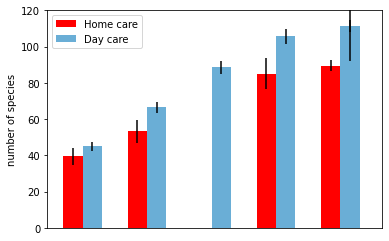

In [175]:
f = draw_age_alpha_onebar()

In [176]:
f.savefig('./figures/alpha-barplot-age.pdf')

# Look at correlation between age and alpha-diversity

### Day-care

In [177]:
tt=dats.filter_samples('kindergarten',['Home'],negate=True)

In [178]:
sp.stats.pearsonr(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies)

(0.6594310994311885, 7.943291488965394e-32)

In [179]:
sp.stats.spearmanr(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies)

SpearmanrResult(correlation=0.7173200184786979, pvalue=7.514636888422434e-40)

In [180]:
sp.stats.linregress(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies)

LinregressResult(slope=3.3979111878350654, intercept=22.88416210087567, rvalue=0.6594310994311882, pvalue=7.943291488966717e-32, stderr=0.2490101337211475, intercept_stderr=4.366367374221319)

### Home-care

In [182]:
tth=dats.filter_samples('kindergarten',['Home'])

In [183]:
sp.stats.pearsonr(tth.sample_metadata.age_months,tth.sample_metadata.avgspecies)

(0.67210610388437, 0.0003217119225773184)

In [184]:
sp.stats.spearmanr(tth.sample_metadata.age_months,tth.sample_metadata.avgspecies)

SpearmanrResult(correlation=0.6601435250642169, pvalue=0.0004476629585865884)

In [185]:
sp.stats.linregress(tth.sample_metadata.age_months,tth.sample_metadata.avgspecies)

LinregressResult(slope=2.0682433979364325, intercept=25.488051414145843, rvalue=0.67210610388437, pvalue=0.00032171192257731844, stderr=0.48579277218411465, intercept_stderr=7.8858145154131005)

# Calculate the p-value for the slope difference
## Using random permutations of the kindergarten/home labels

In [186]:
def get_slope_pval(exp, num_perm=1000):
    '''Get the slope p-value using random label permutations
    
    Parameters
    ----------
    exp: calour.Experiment
        The experiment to test
    num_perm: int, optional
        Number of permutations to test
    
    Returns:
    res: list of float
        The slope difference for each iteration.
        NOTE: res[0] is without permutation, res[1:-1] are the permuted results
    '''
    res = []
    np.random.seed(2020)
    cexp = exp.copy()
    for cperm in range(num_perm):
        # calculate the slopes
        tt=cexp.filter_samples('kindergarten',['Home'],negate=True)
        dc=sp.stats.linregress(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies)
        tth=cexp.filter_samples('kindergarten',['Home'])
        hc=sp.stats.linregress(tth.sample_metadata.age_months,tth.sample_metadata.avgspecies)
        res.append(dc.slope-hc.slope)
        # permute the kindergarten labels
        cexp.sample_metadata['kindergarten']=cexp.sample_metadata['kindergarten'].sample(frac=1).values
    print('orig_diff: %f' % res[0])
    num_big = np.sum(np.abs(res)>=res[0])
    print('pval: %d/%d=%f' % (num_big, len(res), num_big/len(res) ))
    num_ss = np.sum(res>=res[0])
    print('single sided pval: %d/%d=%f' % (num_ss, len(res), num_ss/len(res) ))
    return res

In [187]:
b=get_slope_pval(dats,5000)

orig_diff: 1.329668
pval: 768/5000=0.153600
single sided pval: 333/5000=0.066600


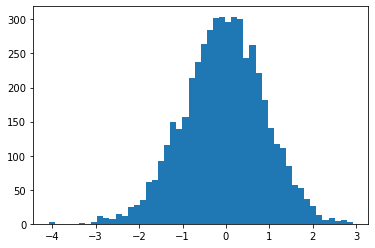

In [188]:
plt.figure()
_=plt.hist(b,50)

# Alpha diversity regression plot for day care and home care

day care pearson correlation:
(0.6594310994311885, 7.943291488965394e-32)
daycare - slope 3.397911, intercept 22.884162, rsq 0.434849
home care pearson correlation:
(0.67210610388437, 0.0003217119225773184)
homecare - slope 2.068243, intercept 25.488051, rsq 0.451727
69 cases where got >= diff
pval 0.069930


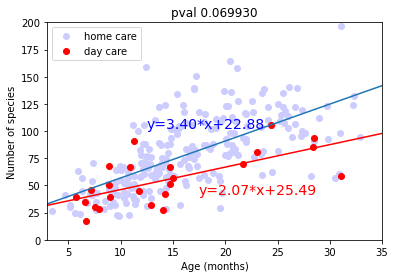

In [40]:
from sklearn.linear_model import LinearRegression
from scipy.linalg import lstsq

f=plt.figure()
tt=dats.filter_samples('kindergarten',['Home'],negate=True)
plt.plot(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,'o',c=[0.8,0.8,1,1])
tt=dats.filter_samples('kindergarten',['Home'],negate=False)
plt.plot(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,'o',c=[1,0,0,1])

tt=dats.filter_samples('kindergarten',['Home'],negate=True)
xpos=np.array(tt.sample_metadata.age_months).reshape(-1, 1)
pearson = scipy.stats.pearsonr(tt.sample_metadata.age_months, tt.sample_metadata.avgspecies)
print('day care pearson correlation:')
print(pearson)
reg = LinearRegression().fit(xpos,tt.sample_metadata.avgspecies)
# reg = lstsq(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies)
x_pred = np.array([[0],[35]])
y_pred = reg.predict(x_pred)
plt.plot(x_pred,y_pred,'-')
x_text=np.array([[17.5]])
y_text = reg.predict(x_text)
plt.text(x_text-5,y_text+20,'y=%.2f*x+%.2f' % (reg.coef_, reg.intercept_),size=14,c='b')
plt.xlim([0,35])
plt.ylim([0,200])
print('daycare - slope %f, intercept %f, rsq %f' % (reg.coef_, reg.intercept_, reg.score(xpos, tt.sample_metadata.avgspecies)))
rslope1 = reg.coef_

tt=dats.filter_samples('kindergarten',['Home'],negate=False)
xpos=np.array(tt.sample_metadata.age_months).reshape(-1, 1)
pearson = scipy.stats.pearsonr(tt.sample_metadata.age_months, tt.sample_metadata.avgspecies)
print('home care pearson correlation:')
print(pearson)
reg = LinearRegression().fit(xpos,tt.sample_metadata.avgspecies)
print('homecare - slope %f, intercept %f, rsq %f' % (reg.coef_, reg.intercept_, reg.score(xpos, tt.sample_metadata.avgspecies)))
# reg = lstsq(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies)
x_pred = np.array([[0],[35]])
y_pred = reg.predict(x_pred)
plt.plot(x_pred,y_pred,'-r')
x_text=np.array([[17.5]])
y_text = reg.predict(x_text)
plt.text(x_text,y_text-20,'y=%.2f*x+%.2f' % (reg.coef_, reg.intercept_),size=14,c='r')
rslope2 = reg.coef_
plt.xlim([3,35])
plt.ylim([0,200])

# calculate p-value using 1000 random label permutations
vals = []
pdat=dats.copy()
np.random.seed(2021)
for cperm in range(1000):
    pdat.sample_metadata['kindergarten'] = np.random.permutation(pdat.sample_metadata['kindergarten'])
    tt=pdat.filter_samples('kindergarten',['Home'],negate=True)
    xpos=np.array(tt.sample_metadata.age_months).reshape(-1, 1)
    reg = LinearRegression().fit(xpos,tt.sample_metadata.avgspecies)
    slope1 = reg.coef_
    tt=pdat.filter_samples('kindergarten',['Home'],negate=False)
    xpos=np.array(tt.sample_metadata.age_months).reshape(-1, 1)
    reg = LinearRegression().fit(xpos,tt.sample_metadata.avgspecies)
    slope2 = reg.coef_
    vals.append(slope1-slope2)

num_big = np.sum(np.array(vals) >= rslope1-rslope2)
print('%d cases where got >= diff' % num_big)
pval = ((num_big+1)/(len(vals)+1))
print('pval %f' % pval)
plt.title('pval %f' % pval)
plt.xlabel('Age (months)')
plt.ylabel('Number of species')
plt.legend(['home care', 'day care'])

f.savefig('supplementary/fig-alpha-regression.pdf')


# Look also at 10k reads/sample for review

In [44]:
dat10k = ca.read_amplicon('./data/gan-subsampled-10k.biom', 'data/gan-subsampled-10k_sample.txt', min_reads=1000, normalize=None)

2021-10-05 17:59:32 INFO loaded 232 samples, 14052 features
2021-10-05 17:59:33 WARNING Do you forget to normalize your data? It is required before running this function
2021-10-05 17:59:33 INFO After filtering, 232 remain.


In [45]:
dat10k=dat10k.filter_sum_abundance(0.000001)

2021-10-05 17:59:33 WARNING Do you forget to normalize your data? It is required before running this function
2021-10-05 17:59:33 INFO After filtering, 1376 remain.


In [46]:
allmean,allstd=get_sample_alpha(dat10k)

In [47]:
dats=dat10k.copy()
for cid in allmean.keys():
    dats.sample_metadata.loc[dats.sample_metadata['sample_ID']==cid,'avgspecies'] = allmean[cid]
    dats.sample_metadata.loc[dats.sample_metadata['sample_ID']==cid,'stdspecies'] = allstd[cid]


AmpliconExperiment with 31 samples, 1376 features
AmpliconExperiment with 51 samples, 1376 features
AmpliconExperiment with 41 samples, 1376 features
AmpliconExperiment with 51 samples, 1376 features
AmpliconExperiment with 35 samples, 1376 features
AmpliconExperiment with 23 samples, 1376 features


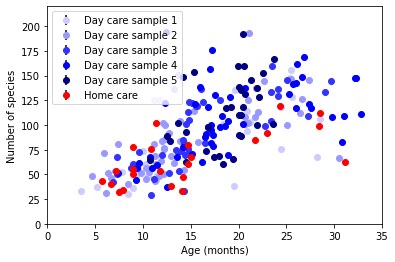

In [48]:
f=plt.figure()
tt=dats.filter_samples('kindergarten',['Home','Family'],negate=True)
tt=tt.filter_samples('Time',1)
print(tt)
plt.errorbar(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,yerr=tt.sample_metadata.stdspecies,fmt='o',c=[0.8,0.8,1,1],ecolor='k',barsabove=True)
tt=dats.filter_samples('Time',2)
print(tt)
plt.errorbar(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,yerr=tt.sample_metadata.stdspecies,fmt='o',c=[0.6,0.6,1,1],ecolor='k',barsabove=True)
tt=dats.filter_samples('Time',3)
print(tt)
plt.errorbar(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,yerr=tt.sample_metadata.stdspecies,fmt='o',c=[0.2,0.2,1,1],ecolor='k',barsabove=True)
tt=dats.filter_samples('kindergarten',['Home','Family'],negate=True)
tt=dats.filter_samples('Time',4)
print(tt)
plt.errorbar(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,yerr=tt.sample_metadata.stdspecies,fmt='o',c=[0,0,1,1],ecolor='k',barsabove=True)
tt=dats.filter_samples('Time',5)
print(tt)
plt.errorbar(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,yerr=tt.sample_metadata.stdspecies,fmt='o',c=[0,0,0.5,1],ecolor='k',barsabove=True)
tt=dats.filter_samples('kindergarten','Home')
print(tt)
plt.errorbar(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,yerr=tt.sample_metadata.stdspecies,fmt='o',c=[1,0,0,1],ecolor='k',barsabove=True)
plt.xlim([0,35])
plt.ylim([0,220])
plt.xlabel('Age (months)')
plt.ylabel('Number of species')
plt.legend(['Day care sample 1','Day care sample 2','Day care sample 3','Day care sample 4','Day care sample 5','Home care'])

In [49]:
f.savefig('review-figs/fig-alpha-age-scatter-10k.pdf')

### and the age category graph

In [50]:
tt=cu.numeric_to_categories(dats,'age_months','age_cat',np.arange(0,35,5),inplace=False)

In [51]:
tt.sample_metadata.age_cat.value_counts()

10-15    74
15-20    44
20-25    42
5-10     36
25-30    26
>30       8
0-5       2
Name: age_cat, dtype: int64

### Get rid of timepoint1 samples (since did not have time to mingle in the kindergarten)

In [52]:
tt=tt.filter_samples('Time',[1],negate=True)

In [53]:
tt.sample_metadata.age_cat.value_counts()

10-15    66
15-20    41
20-25    37
5-10     27
25-30    21
>30       8
0-5       1
Name: age_cat, dtype: int64

age 10-15, home: 62.000000, gan: 78.964912
MannwhitneyuResult(statistic=170.0, pvalue=0.053995994600332095)
gan 57 samples, home 9 samples
age 5-10, home: 48.125000, gan: 54.842105
MannwhitneyuResult(statistic=50.0, pvalue=0.08756563663571082)
gan 19 samples, home 8 samples
age >30, home: 63.000000, gan: 127.714286
MannwhitneyuResult(statistic=0.0, pvalue=0.0938906360495762)
gan 7 samples, home 1 samples
age 25-30, home: 105.500000, gan: 132.526316
MannwhitneyuResult(statistic=3.5, pvalue=0.03601884009533429)
gan 19 samples, home 2 samples
age 20-25, home: 98.666667, gan: 127.470588
MannwhitneyuResult(statistic=17.0, pvalue=0.031076245526067255)
gan 34 samples, home 3 samples
age 15-20, home: nan, gan: 105.195122
MannwhitneyuResult(statistic=0.0, pvalue=0.0)
gan 41 samples, home 0 samples
age 0-5, home: nan, gan: 48.000000
MannwhitneyuResult(statistic=0.0, pvalue=0.0)
gan 1 samples, home 0 samples


<ipython-input-19-aaf0b4e70b45>:23: RuntimeWarning: Mean of empty slice
  alpha_home=np.nanmean(tthome.sample_metadata['avgspecies'])
/Users/amnon/miniconda3/envs/calour/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/amnon/miniconda3/envs/calour/lib/python3.9/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/Users/amnon/miniconda3/envs/calour/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


(0.0, 150.0)

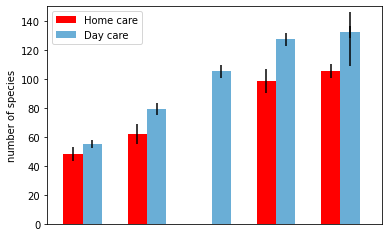

In [54]:
f = draw_age_alpha_onebar()
plt.ylim([0,150])

In [55]:
f.savefig('review-figs/alpha-diversity-bins-10k.pdf')

### and the regression plot

day care pearson correlation:
(0.6626270405628927, 8.53541167242263e-28)
daycare - slope 3.947950, intercept 29.328787, rsq 0.439075
home care pearson correlation:
(0.6584032865273745, 0.0006364031066222026)
homecare - slope 2.251725, intercept 32.640004, rsq 0.433495
49 cases where got >= diff
pval 0.049950


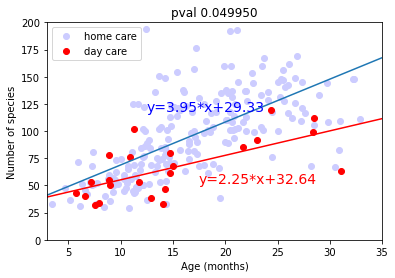

In [56]:
from sklearn.linear_model import LinearRegression
from scipy.linalg import lstsq

f=plt.figure()
tt=dats.filter_samples('kindergarten',['Home'],negate=True)
plt.plot(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,'o',c=[0.8,0.8,1,1])
tt=dats.filter_samples('kindergarten',['Home'],negate=False)
plt.plot(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies,'o',c=[1,0,0,1])

tt=dats.filter_samples('kindergarten',['Home'],negate=True)
xpos=np.array(tt.sample_metadata.age_months).reshape(-1, 1)
pearson = scipy.stats.pearsonr(tt.sample_metadata.age_months, tt.sample_metadata.avgspecies)
print('day care pearson correlation:')
print(pearson)
reg = LinearRegression().fit(xpos,tt.sample_metadata.avgspecies)
# reg = lstsq(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies)
x_pred = np.array([[0],[35]])
y_pred = reg.predict(x_pred)
plt.plot(x_pred,y_pred,'-')
x_text=np.array([[17.5]])
y_text = reg.predict(x_text)
plt.text(x_text-5,y_text+20,'y=%.2f*x+%.2f' % (reg.coef_, reg.intercept_),size=14,c='b')
plt.xlim([0,35])
plt.ylim([0,200])
print('daycare - slope %f, intercept %f, rsq %f' % (reg.coef_, reg.intercept_, reg.score(xpos, tt.sample_metadata.avgspecies)))
rslope1 = reg.coef_

tt=dats.filter_samples('kindergarten',['Home'],negate=False)
xpos=np.array(tt.sample_metadata.age_months).reshape(-1, 1)
pearson = scipy.stats.pearsonr(tt.sample_metadata.age_months, tt.sample_metadata.avgspecies)
print('home care pearson correlation:')
print(pearson)
reg = LinearRegression().fit(xpos,tt.sample_metadata.avgspecies)
print('homecare - slope %f, intercept %f, rsq %f' % (reg.coef_, reg.intercept_, reg.score(xpos, tt.sample_metadata.avgspecies)))
# reg = lstsq(tt.sample_metadata.age_months,tt.sample_metadata.avgspecies)
x_pred = np.array([[0],[35]])
y_pred = reg.predict(x_pred)
plt.plot(x_pred,y_pred,'-r')
x_text=np.array([[17.5]])
y_text = reg.predict(x_text)
plt.text(x_text,y_text-20,'y=%.2f*x+%.2f' % (reg.coef_, reg.intercept_),size=14,c='r')
rslope2 = reg.coef_
plt.xlim([3,35])
plt.ylim([0,200])

# calculate p-value using 1000 random label permutations
vals = []
pdat=dats.copy()
np.random.seed(2021)
for cperm in range(1000):
    pdat.sample_metadata['kindergarten'] = np.random.permutation(pdat.sample_metadata['kindergarten'])
    tt=pdat.filter_samples('kindergarten',['Home'],negate=True)
    xpos=np.array(tt.sample_metadata.age_months).reshape(-1, 1)
    reg = LinearRegression().fit(xpos,tt.sample_metadata.avgspecies)
    slope1 = reg.coef_
    tt=pdat.filter_samples('kindergarten',['Home'],negate=False)
    xpos=np.array(tt.sample_metadata.age_months).reshape(-1, 1)
    reg = LinearRegression().fit(xpos,tt.sample_metadata.avgspecies)
    slope2 = reg.coef_
    vals.append(slope1-slope2)

num_big = np.sum(np.array(vals) >= rslope1-rslope2)
print('%d cases where got >= diff' % num_big)
pval = ((num_big+1)/(len(vals)+1))
print('pval %f' % pval)
plt.title('pval %f' % pval)
plt.xlabel('Age (months)')
plt.ylabel('Number of species')
plt.legend(['home care', 'day care'])

f.savefig('review-figs/fig-alpha-regression-10k.pdf')
